In [1]:
import numpy as np
from numpy import *
import pandas as pd
import os
from pandas import read_csv, DataFrame
import time
import matplotlib.pyplot as plt

path = os.getcwd()


##### DESCRIPCIÓN

Este código sirve para unir los diferentes catálogos de asteroides en uno solo, llamado _Jupiter_trojans.csv_ en la carpeta _/Datos/_, teniendo en cuenta las columnas comunes.

Asimismo, se guardarán los asteroides asteroides conocidos de L4 y de L5 en dos archivos, dentro de la misma carpeta: _Jupiter_trojans_L4.csv_ y _Jupiter_trojans_L5.csv_



### Catálogos individuales

Se cargan los tres archivos de datos en distintos DF

In [17]:
df_Sloan = read_csv(path+"/Datos_Sloan/SDSS_trojans.csv")
df_GaiaDR2 = read_csv(path+"/Datos_Gaia/Gaia_DR2_trojans.csv")
df_GaiaDR3 = read_csv(path+"/Datos_Gaia/Gaia_DR3_trojans.csv")

Se determina cuántos asteroides y cuántas observaciones hay en cada DF y se representa inclinación vs semieje para los tres archivos

SDSS
Nº de asteroides: 703
Nº de observaciones: 1055

Gaia DR2
Nº de asteroides: 183
Nº de observaciones: 2782

Gaia DR3
Nº de asteroides: 247
Nº de observaciones: 4770


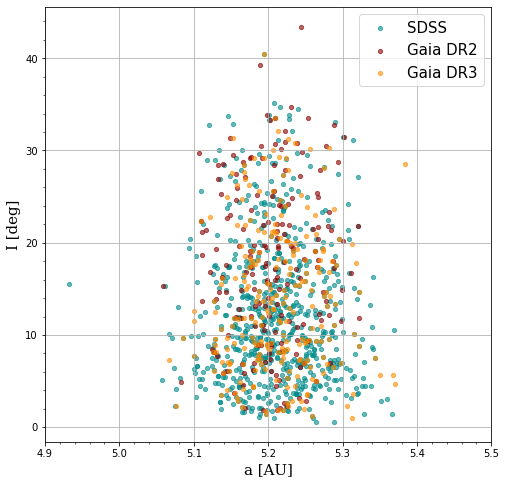

In [18]:
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(df_Sloan.drop_duplicates(subset=['Number'], keep="last").loc[:,'a_orb'],
           df_Sloan.drop_duplicates(subset=['Number'], keep="last").loc[:,'i_orb'], 
           s=18,alpha=0.6,color='darkcyan', label='SDSS')
ax.scatter(df_GaiaDR2.drop_duplicates(subset=['Number'], keep="last").loc[:,'a_orb'],
           df_GaiaDR2.drop_duplicates(subset=['Number'], keep="last").loc[:,'i_orb'], 
           s=18,alpha=0.6,color='darkred', label='Gaia DR2')
ax.scatter(df_GaiaDR3.drop_duplicates(subset=['Number'], keep="last").loc[:,'a_orb'],
           df_GaiaDR3.drop_duplicates(subset=['Number'], keep="last").loc[:,'i_orb'], 
           s=18,alpha=0.6,color='darkorange', label='Gaia DR3')

plt.xlabel(r'a [AU]', fontsize=15,fontfamily='serif') 
plt.ylabel(r'I [deg]', fontsize=15,fontfamily='serif')
plt.minorticks_on()
plt.xlim(4.9,5.5)
plt.grid()
plt.legend( fontsize=15)


print('SDSS')
print('Nº de asteroides:',len(df_Sloan.drop_duplicates(subset=['Number'], keep="last")))
print('Nº de observaciones:', len(df_Sloan))

print('\nGaia DR2')
print('Nº de asteroides:',len(df_GaiaDR2.drop_duplicates(subset=['Number'], keep="last")))
print('Nº de observaciones:', len(df_GaiaDR2))

print('\nGaia DR3')
print('Nº de asteroides:',len(df_GaiaDR3.drop_duplicates(subset=['Number'], keep="last")))
print('Nº de observaciones:', len(df_GaiaDR3))


### Catálogo conjunto

Primero se unen los dos catálogos de Gaia, cuyas columnas son iguales, en uno solo DF

In [28]:
df_Gaia = pd.merge(df_GaiaDR2, df_GaiaDR3, on=('Number','jd','gaia_mag','a_orb','e_orb','i_orb','Delta','R','Phase',
                                               'H','G','gaia_mag_red','V'), how='outer')

print('Nº asteroides totales de Gaia:', len(df_Gaia.drop_duplicates(subset=['Number'], keep="last")))
print('Nº observaciones totales de Gaia:', len(df_Gaia))
print('Nº asteroides comunes DR2 y DR3:', len(df_GaiaDR2.drop_duplicates(subset=['Number'], keep="last"))+
                                          len(df_GaiaDR3.drop_duplicates(subset=['Number'], keep="last"))-
                                          len(df_Gaia.drop_duplicates(subset=['Number'], keep="last")))
 
df_Gaia

Nº asteroides totales de Gaia: 399
Nº observaciones totales de Gaia: 7552
Nº asteroides comunes DR2 y DR3: 31


,Number,jd,gaia_mag,a_orb,e_orb,i_orb,Delta,R,Phase,H,G,gaia_mag_red,V
0,588,2.456892e+06,16.122210,5.209202,0.147923,10.319917,5.397643,6.057591,7.8178,8.26,0.15,8.549690,8.734876
1,588,2.456892e+06,16.200622,5.209202,0.147923,10.319917,5.397720,6.058477,7.8101,8.26,0.15,8.627753,8.812940
2,588,2.456892e+06,16.139169,5.209202,0.147923,10.319917,5.397903,6.060584,7.7916,8.26,0.15,8.565471,8.750658
3,588,2.456893e+06,16.175029,5.209202,0.147923,10.319917,5.397980,6.061467,7.7839,8.26,0.15,8.600984,8.786171
4,588,2.456893e+06,16.120776,5.209202,0.147923,10.319917,5.398240,6.064449,7.7575,8.26,0.15,8.545558,8.730745
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7547,379977,2.457372e+06,20.066934,5.210152,0.118530,21.065749,5.659401,4.943080,7.4876,12.71,0.15,12.833093,13.033220
7548,379977,2.457845e+06,20.379488,5.210152,0.118530,21.065749,5.805035,5.117548,7.7632,12.71,0.15,13.015154,13.215281
7549,379977,2.457845e+06,20.414978,5.210152,0.118530,21.065749,5.805030,5.116729,7.7555,12.71,0.15,13.050994,13.251120
7550,379977,2.457463e+06,20.245841,5.210152,0.118530,21.065749,5.704269,5.167274,8.9562,12.71,0.15,12.898534,13.098660


A continuación, se junta este DF con el de las observaciones de Sloan, cuyas columnas comunes son 'Number', 'jd', 'Delta', 'R', 'Phase', 'a_orb', 'e_orb', 'i_orb', 'H', 'G' y 'V', y se arreglan los datos

In [32]:
df = pd.merge(df_Sloan, df_Gaia, on=('Number','jd','Delta','R','Phase',
                                     'a_orb','e_orb','i_orb','H','G','V'), how='outer')

### Ordenar por número de asteroide
df = df.sort_values('Number')

### Reordenar columnas
df = df[['Name','Number','jd','a_orb','e_orb','i_orb','Delta','R','Phase','umag', 'umag_err', 
         'umag_red', 'gmag', 'gmag_err', 'gmag_red', 'rmag', 'rmag_err', 'rmag_red', 'imag', 'imag_err', 
         'imag_red', 'zmag', 'zmag_err', 'zmag_red', 'Vmag', 'gaia_mag', 'gaia_mag_red',
         'V','H','G']]

### Renombrar columnas number = id, V = v (magnitud reducida) y Phase = alpha, para usar Pyedra
df.rename(columns={'Number': 'id','V':'v','Phase':'alpha'}, inplace=True)

print('Nº asteroides totales:', len(df.drop_duplicates(subset=['id'], keep="last")))
print('Nº observaciones totales:', len(df))
print('Nº asteroides comunes Gaia y Sloan:', len(df_Gaia.drop_duplicates(subset=['Number'], keep="last"))+
                                             len(df_Sloan.drop_duplicates(subset=['Number'], keep="last"))-
                                             len(df.drop_duplicates(subset=['id'], keep="last")))
df

Nº asteroides totales: 990
Nº observaciones totales: 8607
Nº asteroides comunes Gaia y Sloan: 112


,Name,id,jd,a_orb,e_orb,i_orb,Delta,R,alpha,umag,...,imag_red,zmag,zmag_err,zmag_red,Vmag,gaia_mag,gaia_mag_red,v,H,G
1059,NaN,588,2.456893e+06,5.209202,0.147923,10.319917,5.398240,6.064449,7.7575,NaN,...,NaN,NaN,NaN,NaN,NaN,16.120776,8.545558,8.730745,8.26,0.15
1055,NaN,588,2.456892e+06,5.209202,0.147923,10.319917,5.397643,6.057591,7.8178,NaN,...,NaN,NaN,NaN,NaN,NaN,16.122210,8.549690,8.734876,8.26,0.15
1056,NaN,588,2.456892e+06,5.209202,0.147923,10.319917,5.397720,6.058477,7.8101,NaN,...,NaN,NaN,NaN,NaN,NaN,16.200622,8.627753,8.812940,8.26,0.15
1057,NaN,588,2.456892e+06,5.209202,0.147923,10.319917,5.397903,6.060584,7.7916,NaN,...,NaN,NaN,NaN,NaN,NaN,16.139169,8.565471,8.750658,8.26,0.15
1058,NaN,588,2.456893e+06,5.209202,0.147923,10.319917,5.397980,6.061467,7.7839,NaN,...,NaN,NaN,NaN,NaN,NaN,16.175029,8.600984,8.786171,8.26,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,2013 TZ46,412394,2.451815e+06,5.149318,0.063366,27.263493,4.081393,4.950360,6.3638,22.59,...,14.182774,20.64,1.00,14.112774,21.20,NaN,NaN,14.692241,14.06,0.15
1051,2013 TZ46,412394,2.451818e+06,5.149318,0.063366,27.263493,4.098663,4.949216,6.7223,22.35,...,14.374107,20.42,0.17,13.884107,21.26,NaN,NaN,14.746107,14.06,0.15
1052,2014 EG31,412432,2.452339e+06,5.160674,0.020210,8.335597,4.021722,5.000845,2.0321,23.06,...,13.862723,20.21,0.26,13.692723,20.68,NaN,NaN,14.179090,14.01,0.15
1053,2009 KM14,414468,2.452523e+06,5.217817,0.054135,18.304749,4.618148,5.010910,11.0815,24.58,...,13.888078,20.32,0.15,13.498078,21.15,NaN,NaN,14.343878,13.33,0.15


In [33]:
df.to_csv(path+"/Datos/Jupiter_trojans.csv",index=False)

#### L4 y L5

Se seleccionan los asteroides conocidos en cada punto lagrangiano

In [36]:

df = read_csv(path+"/Datos/Jupiter_trojans.csv")
L4 = read_csv(path+"/Datos/HG-L4.csv").loc[:,'id'].to_numpy().tolist()
L5 = read_csv(path+"/Datos/HG-L5.csv").loc[:,'id'].to_numpy()

df_L4 = df
df_L5 = df

for i in range(len(df)):
    if df_L4.loc[i,'id'] not in L4:
        df_L4 = df_L4.drop([i], axis=0)
        
    if df_L5.loc[i,'id'] not in L5:
        df_L5 = df_L5.drop([i], axis=0)

        
print('Nº asteroides L4:', len(df_L4.drop_duplicates(subset=['id'], keep="last")))
print('Nº observaciones L4:', len(df_L4))
print('\nNº asteroides L5:', len(df_L5.drop_duplicates(subset=['id'], keep="last")))
print('Nº observaciones L5:', len(df_L5))


Nº asteroides L4: 105
Nº observaciones L4: 2089

Nº asteroides L5: 78
Nº observaciones L5: 1461


In [37]:
df_L4.to_csv(path+"/Datos/Jupiter_trojans_L4.csv",index=False)
df_L5.to_csv(path+"/Datos/Jupiter_trojans_L5.csv",index=False)